In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
#import datasets
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete70SOZZ/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete70SOZZ/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

#preprocess the data

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()


# explore the processed data

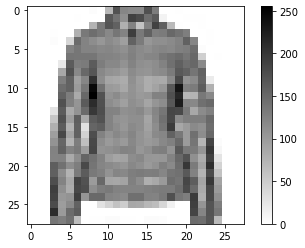

In [14]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

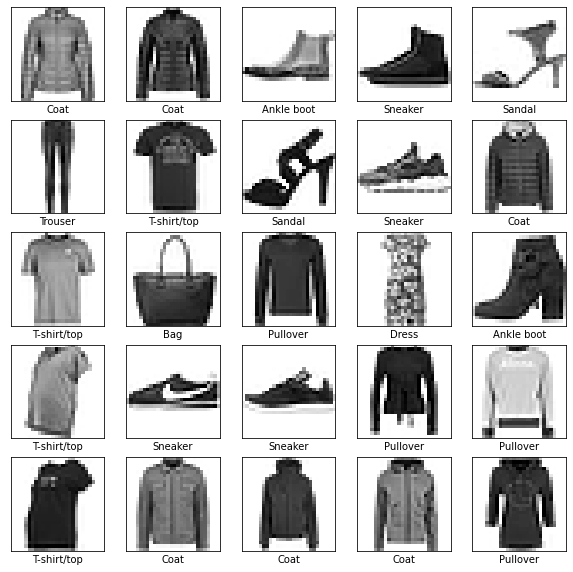

In [15]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

#Build the model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), padding= 'same', activation= tf.nn.relu, input_shape = (28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation= tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2), strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation= tf.nn.relu),
                             tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

#compile the model

In [0]:
model.compile(optimizer= "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'] )

#train the model

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5238 - accuracy: 0.8548
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.9000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2460 - accuracy: 0.9093
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2211 - accuracy: 0.9171
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1997 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1799 - accuracy: 0.9327
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1643 - accuracy: 0.9391
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1529 - accuracy: 0.9430
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1369 - accuracy: 0.9493
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.128

#evaluate accuracy

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [23]:
predictions.shape

(32, 10)

In [24]:
predictions[0]

array([1.09530862e-04, 4.58539853e-06, 5.73021621e-02, 8.98148719e-05,
       9.13867891e-01, 2.12126161e-09, 2.86259931e-02, 6.87126267e-09,
       1.25368445e-08, 7.64319386e-10], dtype=float32)

In [25]:
np.argmax(predictions[0])

4

In [26]:
test_labels[0]

4

In [0]:
# graph

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

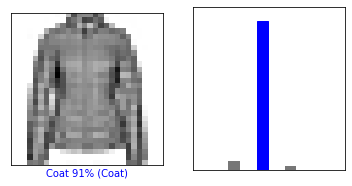

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

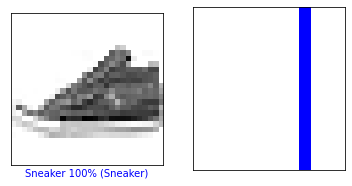

In [32]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

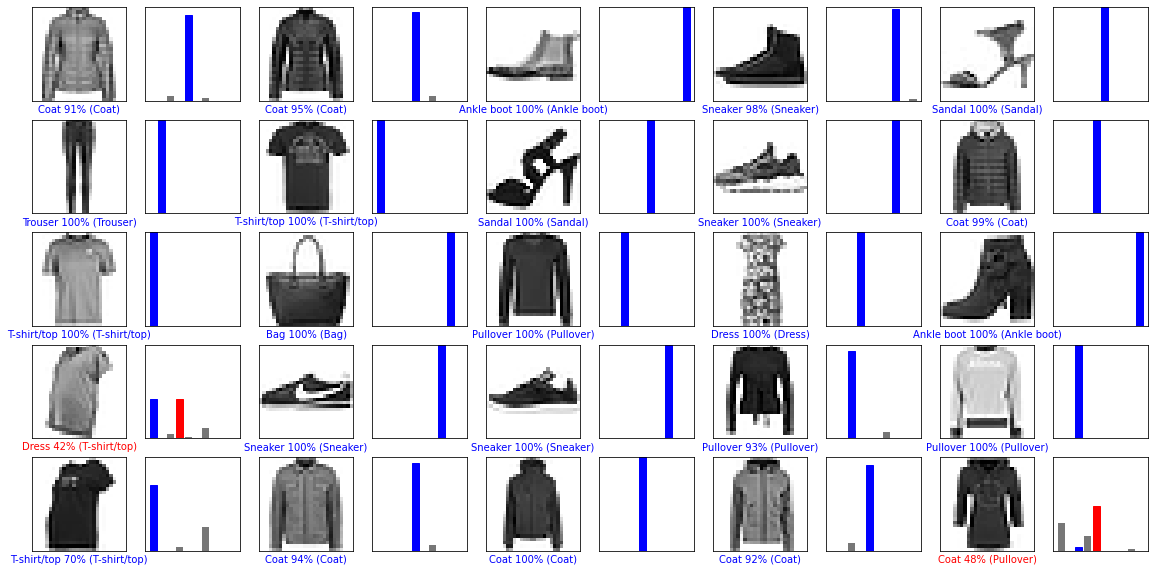

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [36]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [37]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0953070e-04 4.5853958e-06 5.7301860e-02 8.9814304e-05 9.1386825e-01
  2.1212625e-09 2.8625896e-02 6.8712001e-09 1.2536827e-08 7.6431678e-10]]


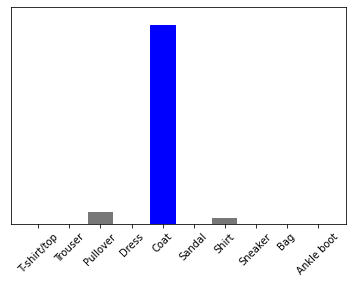

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

4